In [1]:
import pandas as pd
import numpy as np 
from google.colab import auth
auth.authenticate_user()

In [2]:
## G-google mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/CRM_project/้Hw6/'

In [4]:
project_id = 'crmproject-308203'

sql = """ select * from  `crmproject-308203.crm_rangsarid.customer_new` """
df = pd.io.gbq.read_gbq(sql , project_id=project_id, verbose=False, dialect="standard")

In [5]:
df.head(100)

,CUST_CODE,TOTAL_VISIT,TOTAL_SPEND,TICKET_SIZE,STD_SPEND,Duration_LAST_SHOPDATE,DUration_FIRST_SHOPDATE,LENGTH_STAY,AVG_TIME_TO_EVENT,MOD_BASKET
0,CUST0000235688,1,0.63,0.630,0.000,626,626,0,0.0,1
1,CUST0000060915,1,1.06,1.060,0.000,765,765,0,0.0,1
2,CUST0000552995,1,0.98,0.980,0.000,211,211,0,0.0,1
3,CUST0000138770,1,1.83,0.915,0.055,425,425,0,0.0,1
4,CUST0000069692,1,1.56,1.560,0.000,303,303,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
95,CUST0000006052,1,0.53,0.530,0.000,558,558,0,0.0,1
96,CUST0000815872,1,1.54,1.540,0.000,651,651,0,0.0,1
97,CUST0000487493,1,1.30,0.650,0.200,554,554,0,0.0,1
98,CUST0000242019,1,1.04,1.040,0.000,116,116,0,0.0,1


In [8]:
from sklearn.cluster import KMeans
from datetime import date,datetime
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler
sns.set()

In [6]:
## fearture correlation 
corr =df.iloc[:,1:].corr()

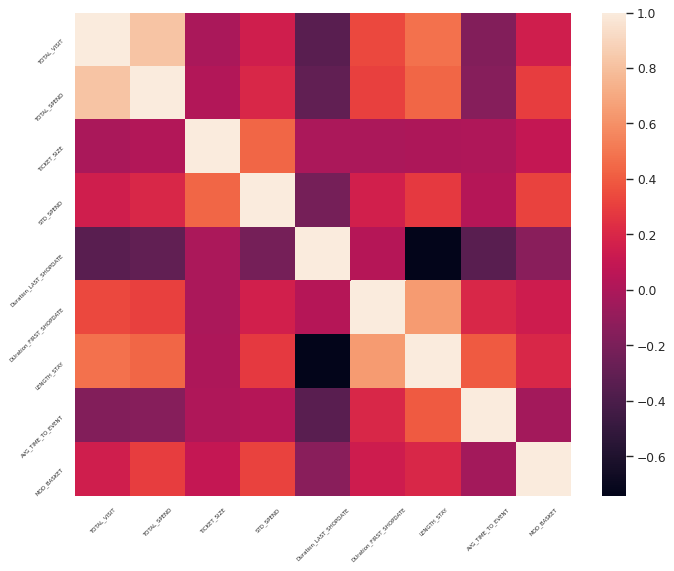

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(corr)
plt.yticks(rotation=45,fontsize=5)
plt.xticks(rotation=45,fontsize=5)
plt.savefig(f'{path}corr9.png',dpi = 150 , format = 'png' )

## Standardize Scalar

In [11]:
X_std = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,1:]))

In [12]:
wcss = []
k_list = []
sil=[]
i=1
for k in range(2, 17):
    km = KMeans(n_clusters = k)
    km = km.fit(X_std)
    k_list.append(k)
    wcss.append(km.inertia_)
    labels = km.labels_
    sil.append(silhouette_score(X_std, km.labels_, metric = 'euclidean'))
    i = i+1
    #print(i)

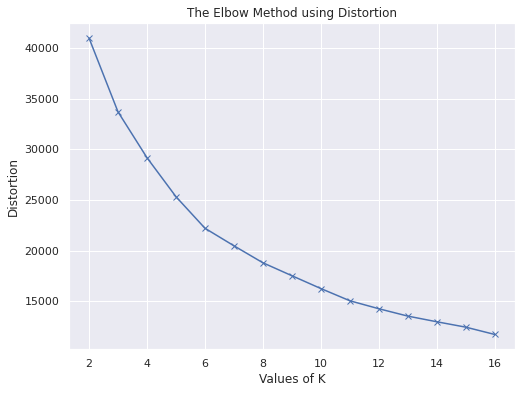

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(k_list, wcss, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
#plt.show()
plt.savefig(f'{path}elbow.png',dpi = 150 , format = 'png' )

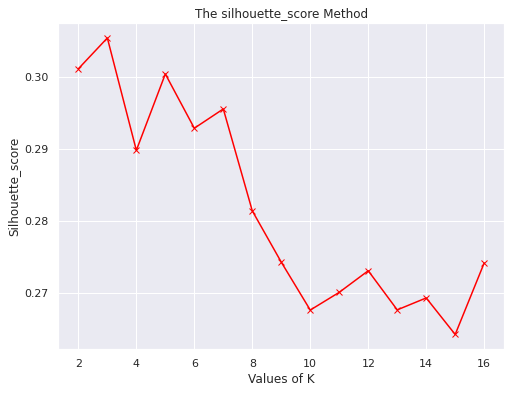

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(k_list, sil, 'bx-',color= 'red')
plt.xlabel('Values of K')
plt.ylabel('Silhouette_score')
plt.title('The silhouette_score Method')
#plt.show() ### K 5
plt.savefig(f'{path}sisl.png',dpi = 150 , format = 'png' )

In [53]:
kmeanModel = KMeans(n_clusters=3)
df['cluster'] = kmeanModel.fit_predict(X_std)
centroids = kmeanModel.cluster_centers_
labels = kmeanModel.labels_

In [58]:
df.head()

,CUST_CODE,TOTAL_VISIT,TOTAL_SPEND,TICKET_SIZE,STD_SPEND,Duration_LAST_SHOPDATE,DUration_FIRST_SHOPDATE,LENGTH_STAY,AVG_TIME_TO_EVENT,MOD_BASKET,cluster
0,CUST0000235688,1,0.63,0.630,0.000,626,626,0,0.0,1,1
1,CUST0000060915,1,1.06,1.060,0.000,765,765,0,0.0,1,1
2,CUST0000552995,1,0.98,0.980,0.000,211,211,0,0.0,1,1
3,CUST0000138770,1,1.83,0.915,0.055,425,425,0,0.0,1,1
4,CUST0000069692,1,1.56,1.560,0.000,303,303,0,0.0,1,1


<Figure size 2160x720 with 0 Axes>

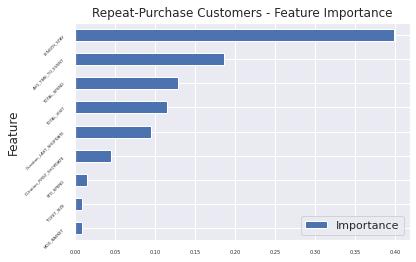

In [59]:
## Feature Importance
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
clf = RandomForestClassifier(criterion = 'entropy').fit(X, y)
plt.figure(figsize=(30,10))
df_importance = pd.DataFrame({'Feature': X.columns, 'Importance' : clf.feature_importances_}).set_index('Feature')
df_importance.sort_values('Importance').plot.barh(title='Repeat-Purchase Customers - Feature Importance' )
#plt.ylabel('feature', fontsize=20)
plt.yticks(rotation=45,fontsize=4)
plt.xticks(fontsize=5)
#plt.legend(loc=2, prop={'size': 1})
plt.savefig(f'{path}feature.png',dpi = 150 , format = 'png' )

In [60]:
dfCluster = df.groupby('cluster', as_index=False).mean()
dfCluster['NO_CUST'] = df[['cluster','CUST_CODE']].groupby('cluster').count()

dfCluster

,cluster,TOTAL_VISIT,TOTAL_SPEND,TICKET_SIZE,STD_SPEND,Duration_LAST_SHOPDATE,DUration_FIRST_SHOPDATE,LENGTH_STAY,AVG_TIME_TO_EVENT,MOD_BASKET,NO_CUST
0,0,17.133046,179.016915,1.981916,1.978629,77.788069,681.844584,604.056515,94.040380,1.968995,2548
1,1,2.206156,18.543568,1.840917,0.942186,411.039756,454.193011,43.153254,12.577228,1.730042,3119
2,2,165.454965,2279.125173,1.882289,2.329545,5.750577,797.963048,792.212471,6.460566,2.496536,433


<Figure size 432x288 with 0 Axes>

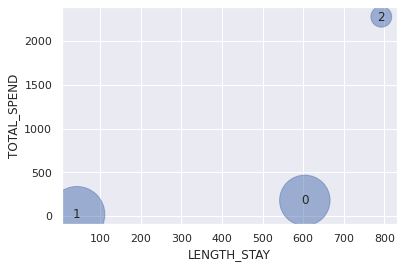

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['LENGTH_STAY'], dfCluster['TOTAL_SPEND'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("LENGTH_STAY")
ax.set_ylabel("TOTAL_SPEND")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['LENGTH_STAY'][i], dfCluster["TOTAL_SPEND"][i]), horizontalalignment='center', verticalalignment='center')

#plt.show()
plt.savefig(f'{path}cluster.png',dpi = 150 , format = 'png' )

In [56]:
df.to_csv(f'{path}cluster.csv')